File and Data Field Descriptions
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

        PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

        HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

        CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

        Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

        Destination - The planet the passenger will be debarking to.

        Age - The age of the passenger.

        VIP - Whether the passenger has paid for special VIP service during the voyage.

        RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

        Name - The first and last names of the passenger.
        
        Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
df = pd.read_csv('../data/train.csv')

# EDA

First, we shall look to understand the columns, search for missing data, duplicates and outliers. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In the numerical columns, the max values for <code>RoomService, FoodCourt, ShoppingMall, Spa,</code> and <code>VRDeck</code> is probably an outlier. Going from less than 100 in the 75th percentile to over 10,000 for the max values!

The categorical columns do not show anything anomolous at this point. <code>PassengerId</code> is a unique identifier which cannot be used as a feature. I think we could also disregard the <code>Name</code> column here as there are 8473 unique names! Interestingly, there are two Gollux Reedall! Could this be a duplicate? 

<code>Cabin</code> also has many unique values but the last letter, which is either 'S' for Starboard or 'P' for Port could be useful as a feature. 

There are also some missing values in several columns. 

## Duplicate

In [6]:
df[df.Name == 'Gollux Reedall']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
827,0881_01,Europa,False,D/32/S,TRAPPIST-1e,41.0,False,3103.0,3.0,0.0,31.0,26.0,Gollux Reedall,False
2852,3081_01,Europa,False,C/118/S,55 Cancri e,50.0,False,0.0,1547.0,0.0,1784.0,1.0,Gollux Reedall,True


In [7]:
df.duplicated().sum()

0

The dataset does not have any duplicated rows.

## Missing Values

In [8]:
# how many missing values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Look like every single feature column has missing values. Are they missing together or are they missing exclusively?

First, we'll take a look at how much data would we lose if we simply drop all the missing values.

In [9]:
df.dropna(axis=0)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


We'll be missing out on about 25% (about 2,000 rows) of the data by dropping all the NaN values indiscriminately. Before we decide on a solution for this problem, let's try to understand the missing values.

In [10]:
null_homeplanet = df[df.HomePlanet.isnull()]
null_homeplanet.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [11]:
null_homeplanet.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,199.000000,195.000000,199.000000,194.000000,198.000000,200.00000
mean,28.793970,202.789744,262.638191,141.742268,231.762626,284.91500
std,14.483455,444.926731,709.517135,578.257312,1057.962364,889.41508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,38.000000,20.500000,25.000000,16.250000,19.750000,60.50000
max,74.000000,2083.000000,4387.000000,7104.000000,11001.000000,7121.00000


In [12]:
null_homeplanet.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,201,0,199,195,197,198,194
unique,201,0,2,193,3,2,194
top,0064_02,NaN,False,F/1411/S,TRAPPIST-1e,False,Colatz Keen
freq,1,NaN,124,2,150,193,1


Seems like the missing values are pretty much exlusive based on the <code>HomePlanet</code> column. They appear to be randomly missing but is this true across all columns?

I wanted to be able to visualize all the missing values in a table/dataframe to see if the missing values are exclusive for each column.

In [13]:
columns = df.columns

# create a list of df containing only null values for each column
null_dfs = [df[df[col].isnull()] for col in columns]

# create another list that shows the total number of missing values for each column
nullsum_dfs = [df.isnull().sum() for df in null_dfs]

# combine them into a dataframe, cutting out PassengerId and Transported
nullsum_combine = pd.DataFrame(index=df.columns[1:-1], columns=columns[1:-1], data=nullsum_dfs[1:-1])


In [14]:
nullsum_combine

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
HomePlanet,201,2,6,4,2,3,6,2,7,3,1,7
CryoSleep,2,217,7,4,1,7,2,3,8,5,7,10
Cabin,6,7,199,4,4,6,4,5,2,2,4,2
Destination,4,4,4,182,3,4,3,6,5,3,2,4
Age,2,1,4,3,179,6,1,4,4,1,4,3
VIP,3,7,6,4,6,203,4,4,4,2,1,1
RoomService,6,2,4,3,1,4,181,2,4,3,2,1
FoodCourt,2,3,5,6,4,4,2,183,2,5,6,5
ShoppingMall,7,8,2,5,4,4,4,2,208,2,6,4
Spa,3,5,2,3,1,2,3,5,2,183,3,6


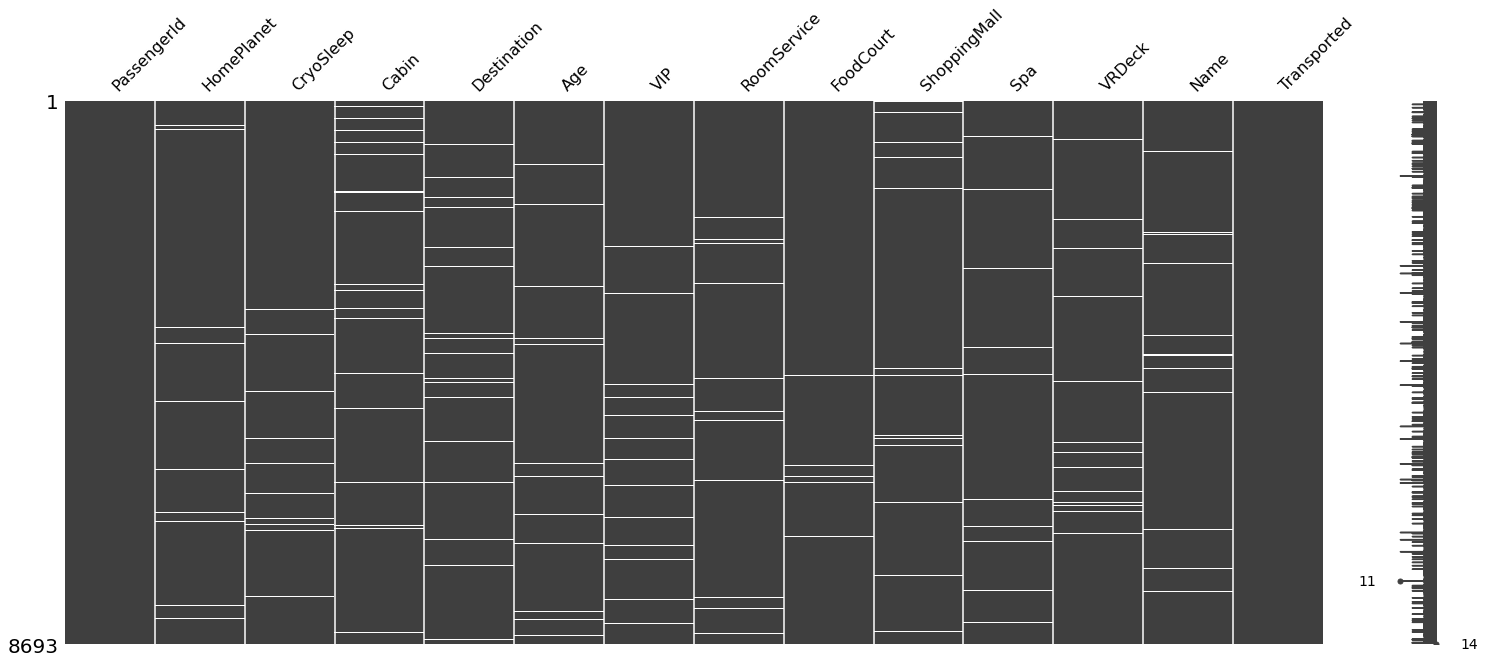

In [15]:
# visualize the missing values
msno.matrix(df);

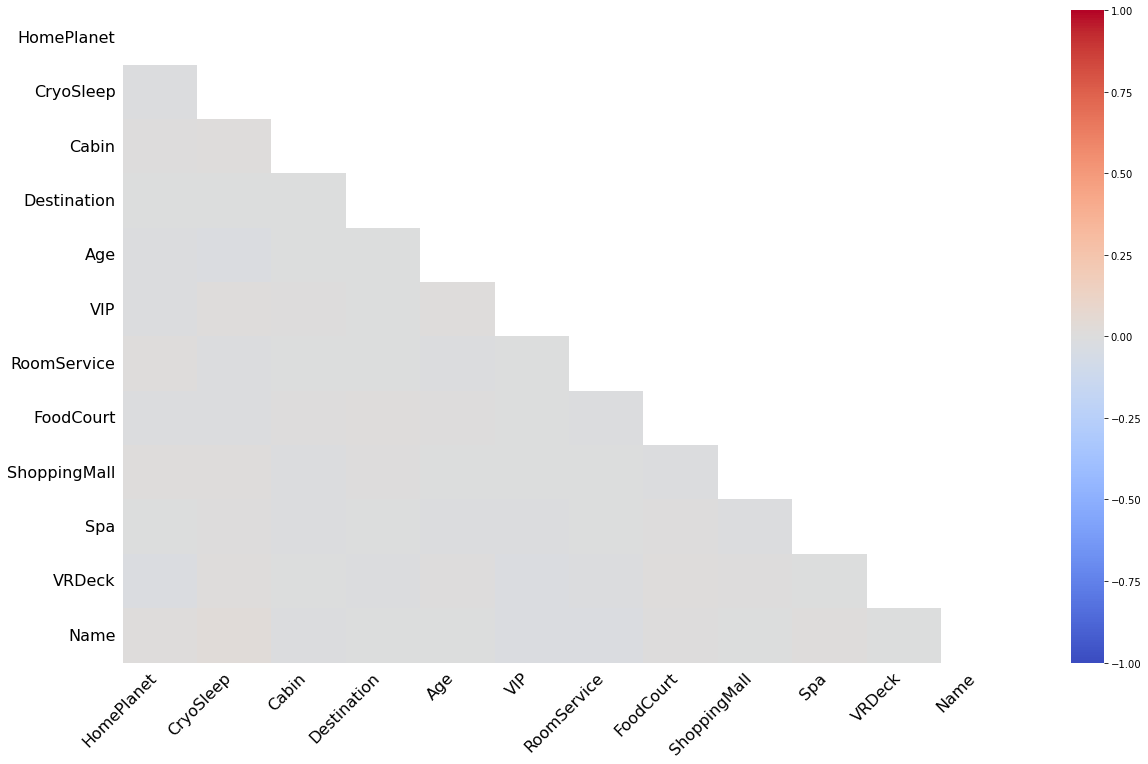

In [16]:
# see how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(df, cmap='coolwarm');

The rows of the DataFrame above show how many missing values there are for that column name.
The columns represents a DataFrame that has all the missing values present for the respective column name. 

In essence, we are looking to see if the missing values overlap a lot between columns. And it appears that they are more or less exclusive from each other which is represented by the diagonal of larger numbers. The matrix of missing values also show similar thing. Furthermore, the heatmap confirms that there's little to no correlation between missing variables. It could be concluded that the data is Missing Completely At Random (MCAR) or at least Missing At Random (MAR). In this case, it's probably safe to impute the missing data as they are likely to be MCAR or MAR, at worst. 

In [17]:
# TODO: Impute Missing Values with mean/median and mode
# TODO: Random forest classifiers and permutation test to see feature importance
# TODO: there will be dummy variables, try leaving it out and scaling it and see if it makes a difference in predictions

Before we go about filling missing values, understanding the columns/features further could be helpful.

### Continuous Variables

We'll look at the continuous features and decide on an appropriate imputation technique.

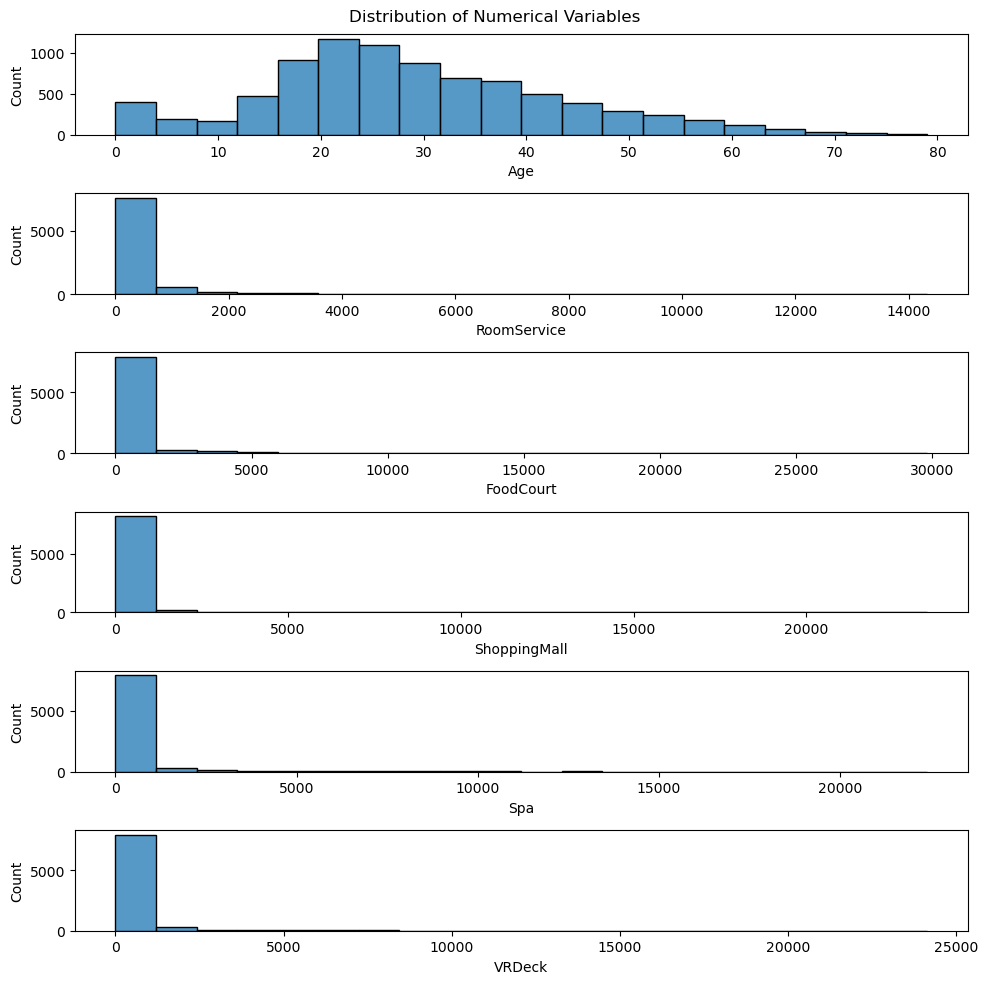

In [18]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(figsize=(10,10), dpi=100, nrows=6)

fig.suptitle('Distribution of Numerical Variables')

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i], bins=20)

fig.tight_layout() 
    

The Age of the passengers are right-skewed, most of the passengers are in their 20s. We could impute the missing values for 'Age' with the median/mean. 

There are many outliers for the luxury spending in this dataset. Each amenity hasmore than 5,000 passengers not spending any money on it. Are they the same group of people? Are people who skipped on VRDeck also the same people who didn't go for Spa? 

In [19]:
# see how many people not spend any money on any of the services/entertainment
zero_spend = df.query('RoomService==0 and FoodCourt==0 and ShoppingMall==0 and Spa==0 and VRDeck==0')
zero_spend['PassengerId'].count()

3247

In [20]:
zero_spend.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,3247,3170,3160,3158,3193,3161,3175
unique,3247,3,2,2437,3,2,3174
top,0001_01,Earth,True,G/1368/P,TRAPPIST-1e,False,Sharie Gallenry
freq,1,1540,2690,6,2063,3137,2


So there are more than 3,000 people here. And, the majority of them are in CryoSleep, of course they didn't spend any money on Spa and others, they are sleeping!

At first, imputing the missing values with zero seemed reasonable but after learning about this distinction, we should look at the spending of passengers who are not in cryo sleep. 

In [21]:
cryo_false = df[df.CryoSleep==False]

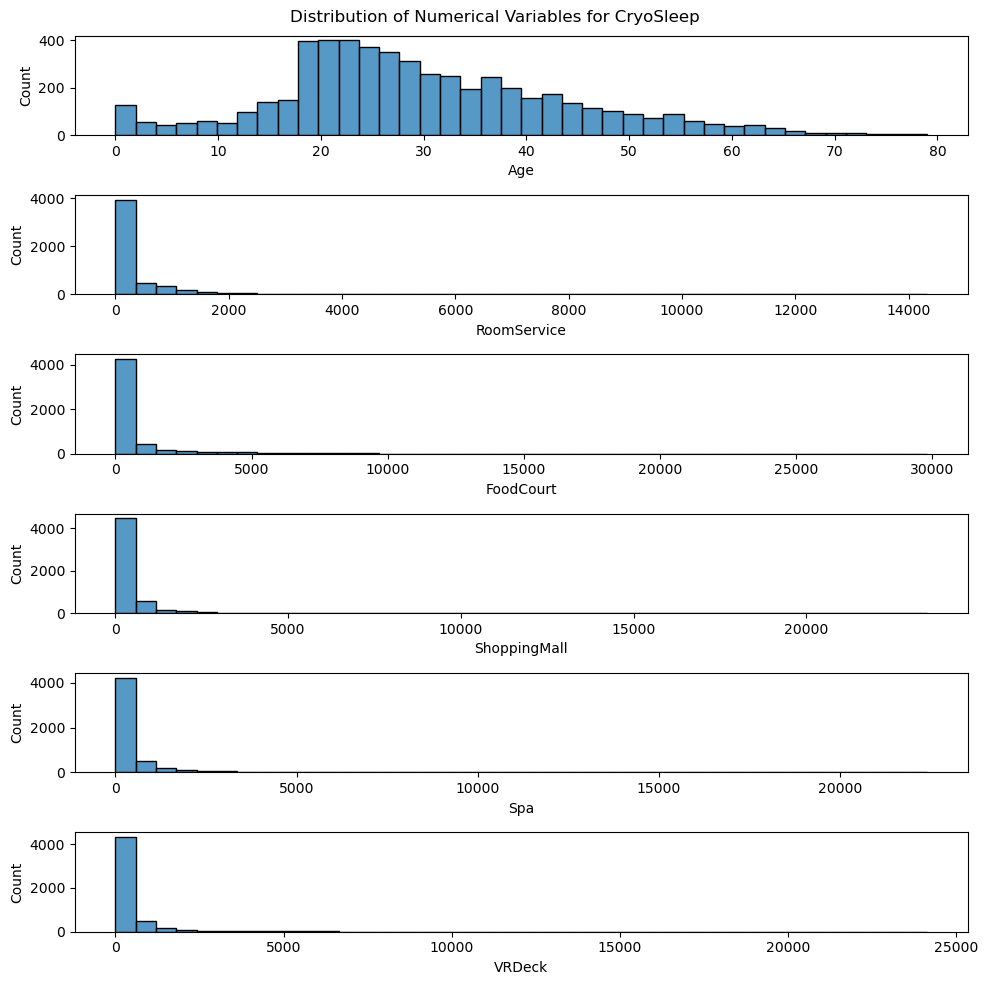

In [22]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100, nrows=6)

fig.suptitle('Distribution of Numerical Variables for CryoSleep')

for i, col in enumerate(num_cols):
    sns.histplot(data=cryo_false, x=col, ax=ax[i], bins=40)

fig.tight_layout()

In [23]:
# how many awake passengers didn't spend any money on any of the amenities
zero_spend = cryo_false.query('RoomService==0 and FoodCourt==0 and ShoppingMall==0 and Spa==0 and VRDeck==0')
zero_spend['PassengerId'].count()

470

Okay, this could help us impute the 'Age' column better because now we know that passengers younger than 13 did not spend any money on luxury amenities, which makes sense as they're children. 

The proportion of people who at least spend some money are, as expected, more than those who are sleeping. 

However, about half of them still do not indulge in any luxury or have low spending. Most people who do spend simply do not spend on multiple luxury amenities. If they do, it appears to be only for one or two at most. 

Now that we've determined that's the case, we can impute 'Age' with the median and the luxury amenities with zeros. 

In [24]:
# impute Age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [25]:
# impute luxury amenities columns
luxury_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in luxury_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
# make a new column showing the total luxury spend
df['LuxurySpend'] = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

In [27]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
LuxurySpend       0
dtype: int64

### Categorical Variables

It seems reasonable to simply impute these columns with mode. However, before we commit. We should probably inspect them first. 

The categorical variables to explore are HomePlanet, CryoSleep, Cabin, Destination, and VIP. 

In [28]:
col_reorder = ['PassengerId', 'Name', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'LuxurySpend', 'Transported']

df = df.reindex(columns=col_reorder)

#### Home Planet

In [29]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

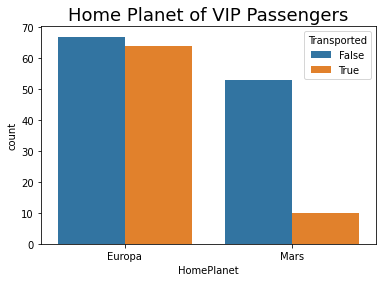

In [30]:
plt.title(fontsize=18, label='Home Planet of VIP Passengers')
sns.countplot(data=df[df.VIP==True], x='HomePlanet', hue='Transported');

In [31]:
df.groupby('HomePlanet')[['LuxurySpend']].describe()

LuxurySpend                                                      \
                 count         mean          std  min  25%     50%     75%   
HomePlanet                                                                   
Earth           4602.0   673.337462   771.307925  0.0  0.0   704.0   888.0   
Europa          2131.0  3451.624589  4845.099433  0.0  0.0  1901.0  5346.0   
Mars            1759.0  1051.256964  1343.371706  0.0  0.0   946.0  1702.5   

                     
                max  
HomePlanet           
Earth        6335.0  
Europa      35987.0  
Mars        10801.0

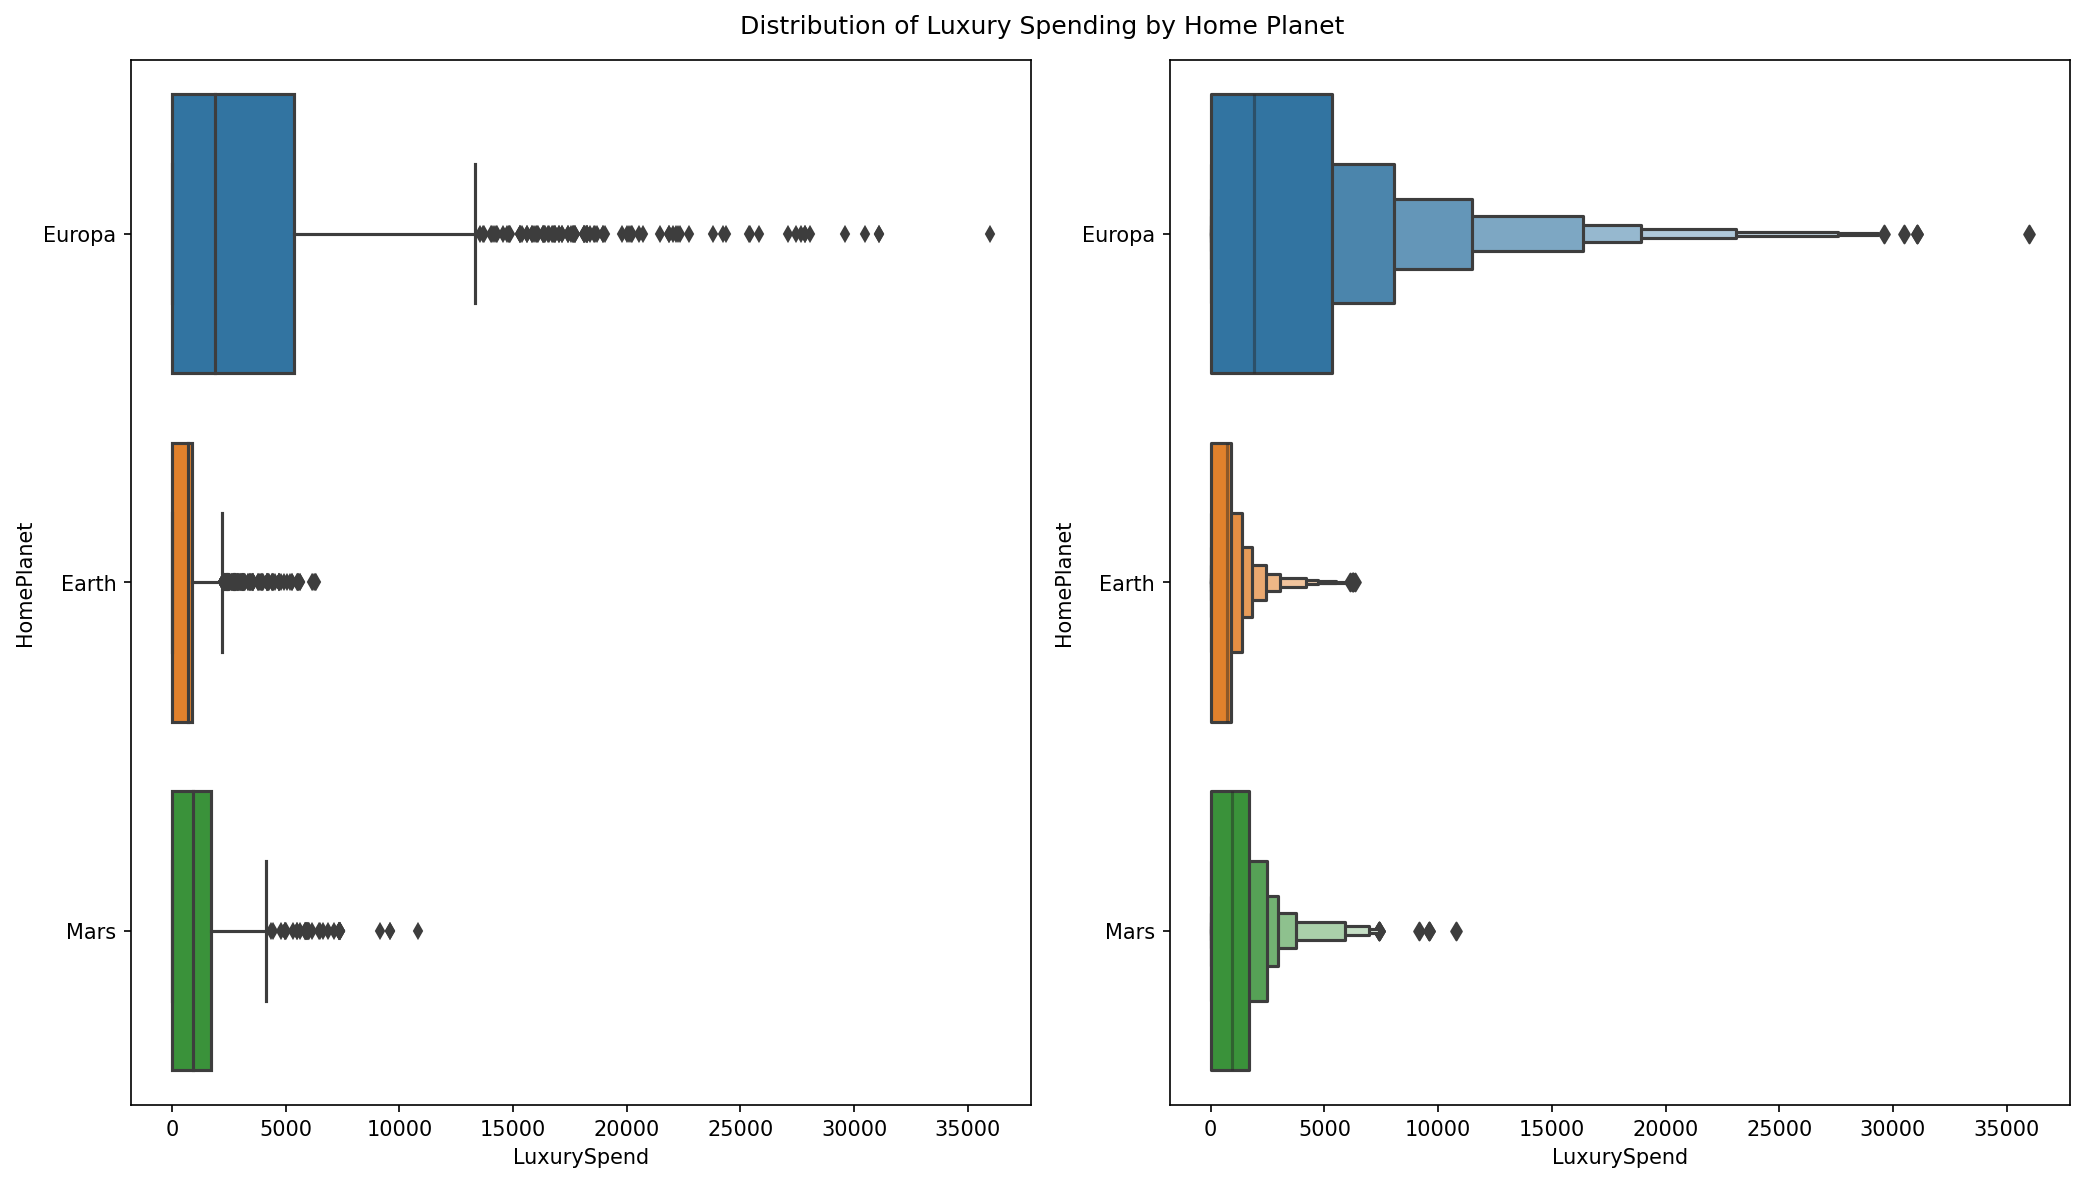

In [32]:
fig, ax = plt.subplots(ncols=2, dpi=150)
fig.suptitle('Distribution of Luxury Spending by Home Planet')
fig.set_figheight(8)
fig.set_figwidth(14)
sns.boxplot(data=df,
            y='HomePlanet',
            x='LuxurySpend', ax=ax[0])
sns.boxenplot(data=df,
            y='HomePlanet',
            x='LuxurySpend', ax=ax[1])
fig.tight_layout()

It looks like passengers from Europa have worse luck than the other two, the ratio of Europa's passengers who are transported are higher. They also happen to be more extravagant on average. The majority of VIP passengers are also from Europa. Interestingly, not a single person from Earth is a VIP passenger. How expensive is the ticket? Surely the Elon Musk/Jeff Bezos of that era could've afforded it.

At this point, we can make a relatively solid guess at the value we should impute the missing rows with. We know that passengers from Europa are spent more money, and we know none of the VIPs are from Earth. We also know that the mode of the column is Earth. 

In [33]:
# impute HomePlanet with Europa if VIP is true where it is null. 
df.loc[(df.VIP==True) & (df.HomePlanet.isnull()), 'HomePlanet'] = 'Europa'

# impute HomePlanet with Europa if LuxurySpend is more than 6400 (max Earth spending)
df.loc[(df.HomePlanet.isnull()) & (df.LuxurySpend>6400), 'HomePlanet'] = 'Europa'

# impute the rest with Earth
df.loc[df.HomePlanet.isnull(), 'HomePlanet'] = 'Earth'

In [34]:
df.HomePlanet.isnull().sum()

0

#### CryoSleep

In [35]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

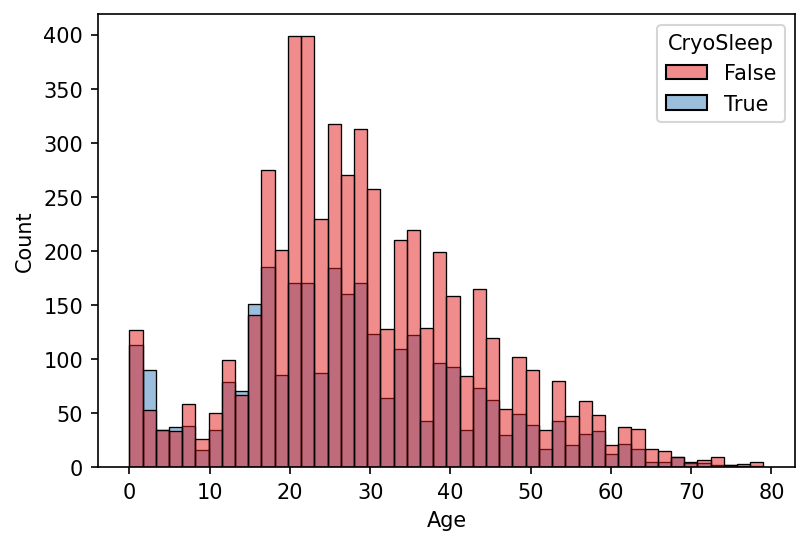

In [36]:
plt.figure(dpi=150)
sns.histplot(data=df, x='Age', hue='CryoSleep', palette='Set1');

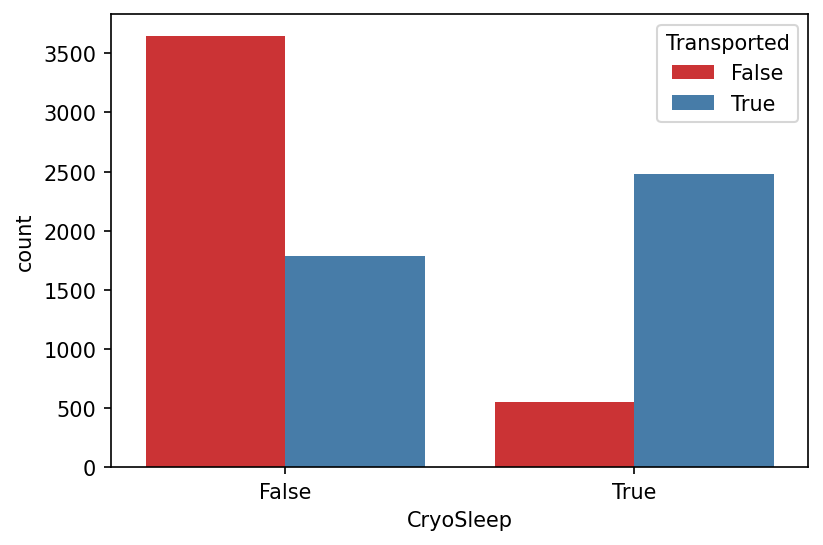

In [37]:
plt.figure(dpi=150)
sns.countplot(data=df, x='CryoSleep', hue='Transported', palette='Set1');

Passengers that are cryo sleeping are way more likely to be transported than those who are not. It's then reasonable to impute the missing cryo sleep as True when a passenger is transported and False if they aren't transported. 

In [38]:
# impute missing CryoSleep with True if they are transported and False if not transported
df.loc[(df.CryoSleep.isnull())&(df.Transported==True), 'CryoSleep'] = True
df.loc[(df.CryoSleep.isnull())&(df.Transported==False), 'CryoSleep'] = False

In [39]:
df.CryoSleep.isnull().sum()

0

#### Cabin

The Cabin column has a Deck/Num/Side formatting to it. Directly using this as a feature would not be appropriate as they have too many unique values. We'll split the Cabin column and make three new columns

In [40]:
df['CabinDeck'] = df['Cabin'].str.split('/').str[0]
df['CabinNum'] = df['Cabin'].str.split('/').str[1]
df['CabinSide'] = df['Cabin'].str.split('/').str[2]

In [41]:
df.CabinDeck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [42]:
df.CabinNum.nunique()

1817

In [43]:
df.CabinSide.unique()

array(['P', 'S', nan], dtype=object)

CabinDeck and CabinSide might be usefull as features. We will drop Cabin and CabinNum and proceed from here.

In [44]:
df = df.drop(['Cabin', 'CabinNum'], axis=1)

In [45]:
# check new df
df.head()

,PassengerId,Name,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,Transported,CabinDeck,CabinSide
0,0001_01,Maham Ofracculy,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Juanna Vines,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,True,F,S
2,0003_01,Altark Susent,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,False,A,S
3,0003_02,Solam Susent,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,False,A,S
4,0004_01,Willy Santantines,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,True,F,S


#### Cabin Side

Starboard or Portside? These values basically mean right or left side of the spaceship. We'll see if it makes any difference being on the Starboard side or portside.

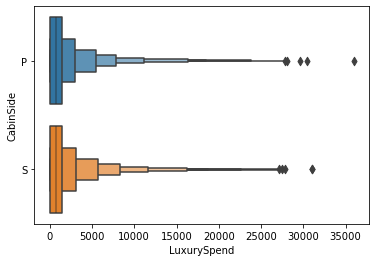

In [46]:
sns.boxenplot(data=df, x='LuxurySpend', y='CabinSide');

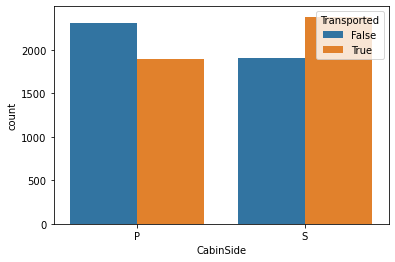

In [47]:
sns.countplot(data=df, x='CabinSide', hue='Transported');

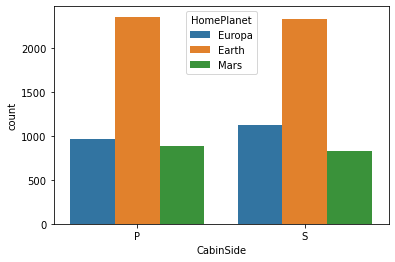

In [48]:
sns.countplot(data=df, x='CabinSide', hue='HomePlanet');

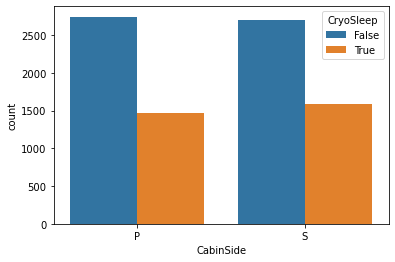

In [49]:
sns.countplot(data=df, x='CabinSide', hue='CryoSleep');

There is no discernable differences between either sides. Both sides appear to have more or less similar numbers for most things. 

#### Cabin Deck

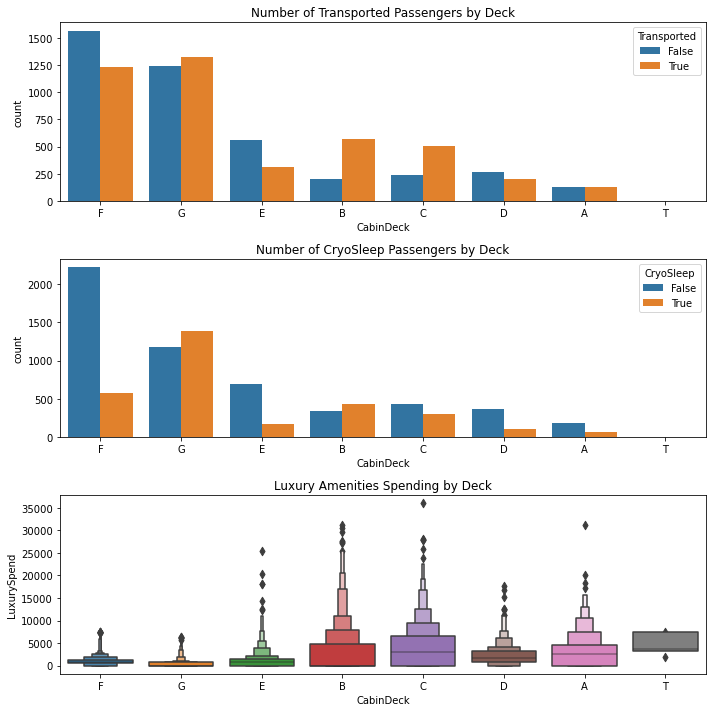

In [50]:
cabin_count_order = df['CabinDeck'].value_counts().index

fig, ax = plt.subplots(nrows=3)
fig.set_figheight(10)
fig.set_figwidth(10)

sns.countplot(data=df, 
              x='CabinDeck', 
              hue='Transported', 
              order=cabin_count_order, 
              ax=ax[0])
ax[0].set_title('Number of Transported Passengers by Deck')

sns.countplot(data=df, 
              x='CabinDeck', 
              hue='CryoSleep', 
              order=cabin_count_order, 
              ax=ax[1])
ax[1].set_title('Number of CryoSleep Passengers by Deck')
ax[1].legend(loc='upper right', title='CryoSleep')

sns.boxenplot(data=df, 
              y='LuxurySpend', 
              x='CabinDeck', 
              order=cabin_count_order, 
              ax=ax[2])
ax[2].set_title('Luxury Amenities Spending by Deck')

fig.tight_layout()

We are seeing a bit more pattern here by looking at decks. 
<li>Most people are in deck F or G. Many of deck G's passengers are in cryo sleep.</li>
<li>Passengers in deck B or C are more likely to be transported and also more extravagant, could be mostly from Europa as we've seen before.</li>
<li>And there aren't too many passengers in deck T. </li>

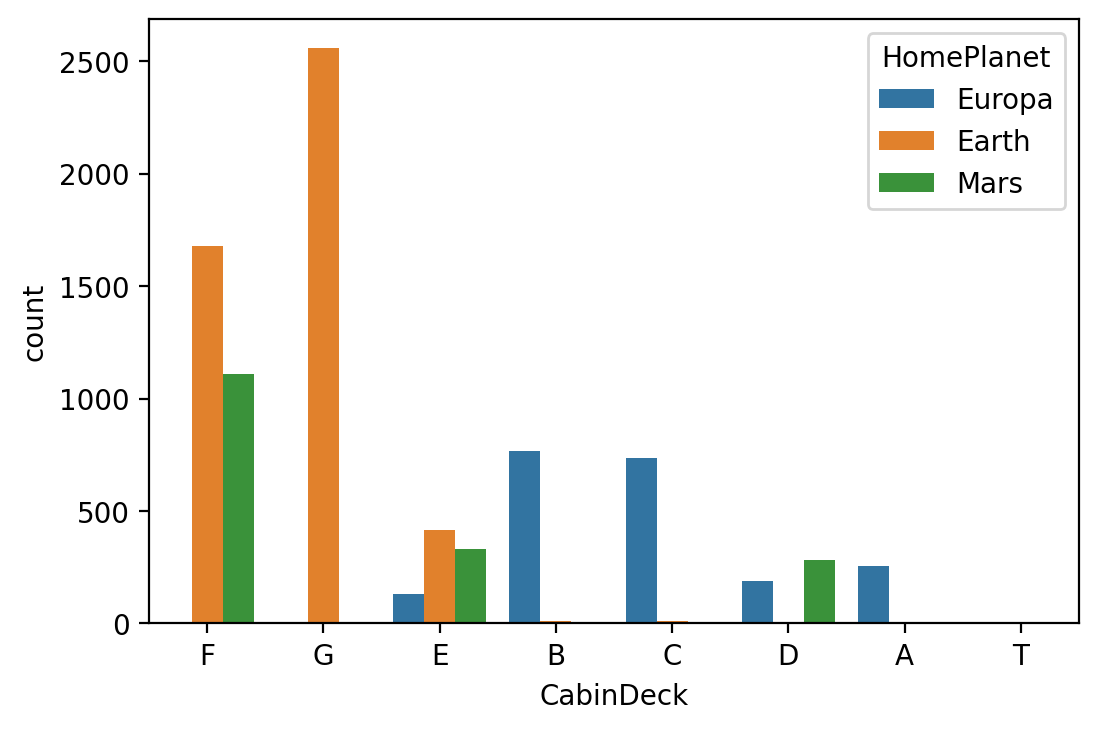

In [51]:
plt.figure(dpi=200)
sns.countplot(data=df, x='CabinDeck', hue='HomePlanet', order=cabin_count_order);

In [52]:
df[df.CabinDeck=='T']

,PassengerId,Name,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,Transported,CabinDeck,CabinSide
1004,1071_01,Alraida Dingauge,Earth,False,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,14.0,60.0,1817.0,False,T,P
2254,2414_01,Mergak Headfair,Europa,False,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,7411.0,False,T,P
2734,2935_01,NaN,Europa,False,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,7412.0,False,T,P
2763,2971_01,Pent Sessiouse,Europa,False,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,3164.0,True,T,P
4565,4863_01,Phacton Unsible,Europa,False,TRAPPIST-1e,37.0,False,1721.0,667.0,0.0,28.0,1362.0,3778.0,False,T,S


Now, we have a more reasonable assumptions we can make when imputing missing CabinDeck values. Still using the mode but based on the HomePlanet column.

Here's my imputing conditions:
<li>If passengers are from Earth, we'll impute NaN values with G</li>
<li>If they're from Mars, we'll impute NaNs with F</li>
<li>If they're from Europa, we'll impute it with B</li>

In [53]:
# impute missing CabinDeck
df.loc[(df.HomePlanet=='Earth')&(df.CabinDeck.isnull()), 'CabinDeck'] = 'G'
df.loc[(df.HomePlanet=='Mars')&(df.CabinDeck.isnull()), 'CabinDeck'] = 'F'
df.loc[(df.HomePlanet=='Europa')&(df.CabinDeck.isnull()), 'CabinDeck'] = 'B'

In [54]:
# drop CabinSide
df = df.drop('CabinSide', axis=1)

In [55]:
df.isnull().sum()

PassengerId       0
Name            200
HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
LuxurySpend       0
Transported       0
CabinDeck         0
dtype: int64

#### VIP

In [56]:
df[df.VIP==True].shape

(199, 15)

In [57]:
df[df.VIP.isnull()]['HomePlanet'].value_counts()

Earth     118
Mars       43
Europa     42
Name: HomePlanet, dtype: int64

We don't have many VIP passengers to begin with. Only 199 in total out of 8,000+ passengers. Furthermore, most of the missing values in VIPS are from Earth, which we have seen do not have any representative in the VIP. Therefore, we'll simply impute the null values here with False

In [58]:
df['VIP'] = df['VIP'].fillna(False)

In [59]:
df.isnull().sum()

PassengerId       0
Name            200
HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
LuxurySpend       0
Transported       0
CabinDeck         0
dtype: int64

#### Destination

In [60]:
df[df.Destination.isnull()]['HomePlanet'].value_counts()

Earth     103
Mars       42
Europa     37
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

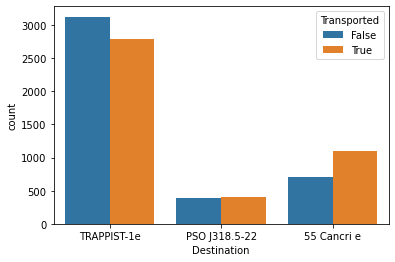

In [61]:
sns.countplot(data=df, x='Destination', hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

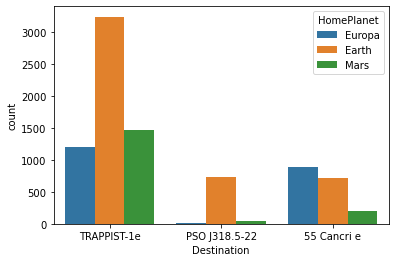

In [62]:
sns.countplot(data=df, x='Destination', hue='HomePlanet')

In [63]:
df.groupby('Destination')['HomePlanet'].value_counts()

Destination    HomePlanet
55 Cancri e    Europa         891
               Earth          716
               Mars           193
PSO J318.5-22  Earth          728
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3244
               Mars          1475
               Europa        1196
Name: HomePlanet, dtype: int64

The TRAPPIST-1e sure is a popular destination! We'll impute missing destination with this value.

In [64]:
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

We have imputed all the missing values. Now, we'll look at the outliers and see what we should do about it.

## Outliers

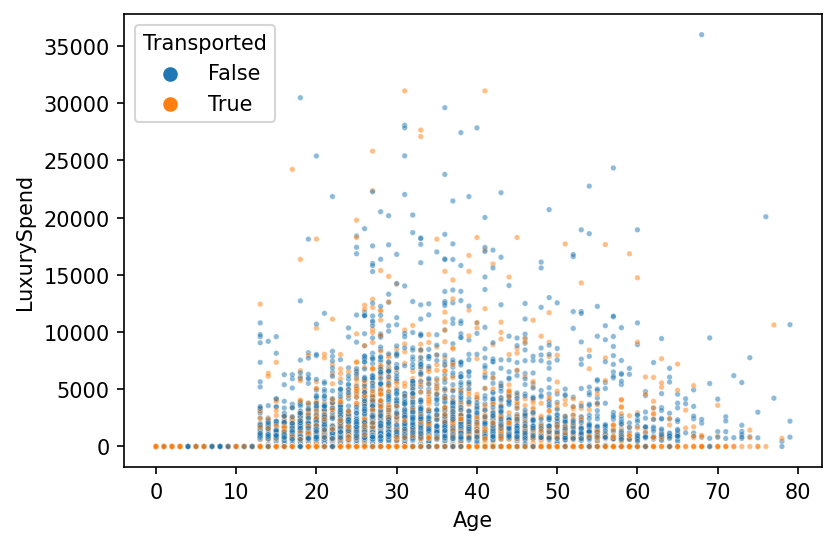

In [65]:
plt.figure(dpi=150)
sns.scatterplot(data=df, 
                x='Age', 
                y='LuxurySpend', 
                hue='Transported', 
                alpha=0.5,
                s=7);

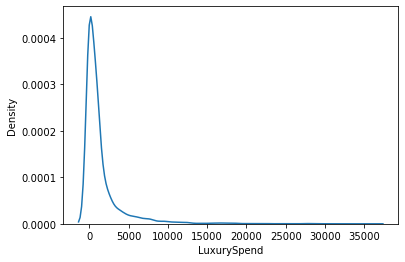

In [66]:
sns.kdeplot(data=df, x='LuxurySpend');

As we can see from the figures above and here, the spending columns doesn't have a normal distribution. Therefore, even though it's outliers when looking at boxplots and scatterplot, it's actually the nature of the data. The shape follows a Pareto distribution. Removing them would be unwise. Perhaps we could transform it to minimize the variance before fitting it to a machine learning model of choice. 

In [67]:
# df.to_csv('data/clean_data.csv', index=False)
df.head()

,PassengerId,Name,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,Transported,CabinDeck
0,0001_01,Maham Ofracculy,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,False,B
1,0002_01,Juanna Vines,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,True,F
2,0003_01,Altark Susent,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,False,A
3,0003_02,Solam Susent,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,False,A
4,0004_01,Willy Santantines,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,True,F


In [68]:
# reorder the df
cabin_column = df.pop('CabinDeck')
df.insert(3, 'CabinDeck', cabin_column)

In [69]:
# drop name column
df = df.drop('Name', axis=1)

In [70]:
df.to_csv('../data/clean_data.csv', index=False)